Il faut forcer un des agents à fixer un prix bas pour voir comment il réagit

In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

#.py
from core import qlearning as q
from core import best_response_grid as br

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
times = []
rewards = []
epsilon = []
prices = []

# Initialization of prices p0 (done directly in each agent)
for agent in agents:
    agent.p = np.random.choice(agent.A)

# Initialization of state
s_t = env([agent.p for agent in agents])[1]
for agent in agents:
    agent.s_t = s_t
s_ind = agents[0].find_index(agents[0].s_t)
for agent in agents:
    agent.s_ind = s_ind

# Iterative phase
for t in range(10**6):
    # Actions and state at t+1
    for agent in agents:
        agent.a_ind = agent.get_next_action()

    s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
    for agent in agents:
        agent.s_t1 = s_t1
        
    s_ind1 = agents[0].find_index(agents[0].s_t1)
    for agent in agents:
        agent.s_ind1 = s_ind1

    times.append(t)
    ret = env(s_t1)
    quant, price, cost = ret

    re = ret[0]*ret[1]-ret[0]*ret[2]
    rewards.append(re)
    epsilon_values = [agent.epsilon for agent in agents]
    epsilon.append(epsilon_values)
    prices.append([agent.p for agent in agents])

    for i, agent in enumerate(agents):
        agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
    
total_rewards.append(rewards)


aggregated_agents = np.array(total_rewards).mean(axis=0)

for agent in agents:
    final_q_matrices.append(agent.Q.copy()) # retrieve the matrix

In [25]:
# Game phase with trained agents
# Number of game simulation steps
grid = br.GridBR()
game_rewards = []

rewards = []  # Store rewards for each game simulation step
prices = []

# Initialization of the starting state for each agent
s_t = (env([agent.p for agent in agents])[1][0],
       grid.BR_price(env([agent.p for agent in agents])[1][0])) # We deviate agent 2 so that it sets a lower price yielding higher profit
for agent in agents:
    agent.s_t = s_t

s_ind = agents[0].find_index(agents[0].s_t)
for agent in agents:
    agent.s_ind = s_ind
    
# Game simulation
for t in range(15):  # Change the number of steps if necessary
    # Agents' actions (deterministic policy)
    for agent in agents:
        agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
        
    # Next state and reward
    s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
    ret = env(s_t1)
    quant, price, cost = ret

    re = ret[0]*ret[1]-ret[0]*ret[2]
    rewards.append(re)
    prices.append(price)
        
    # Update state for the next step
    s_t = s_t1
    for agent in agents:
        agent.s_t = s_t
    s_ind1 = agents[0].find_index(s_t1)
    for agent in agents:
        agent.s_ind1 = s_ind1
    
    for i, agent in enumerate(agents):
        agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
    

print(f"Rewards: {rewards}")
print(f"Prices: {prices}")

Rewards: [array([0.28272627, 0.31197786]), array([0.33462698, 0.20864308]), array([0.30253787, 0.25121216]), array([0.25951759, 0.28423276]), array([0.21095841, 0.30044391]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697]), array([0.29199697, 0.29199697])]
Prices: [[1.6974824430448874, 1.658485452808621], [1.541494482099822, 1.7364794332811537], [1.5804914723360883, 1.658485452808621], [1.6194884625723547, 1.5804914723360883], [1.658485452808621, 1.5024974918635556], [1.658485452808621, 1.658485452808621], [1.658485452808621, 1.658485452808621], [1.658485452808621, 1.658485452808621], [1.658485452808621, 1.658485452808621], [1.658485452808621, 1.658485452808621], [1.658485452808621, 1.658485452808621], [1.658485452808621, 1.658485452808621], 

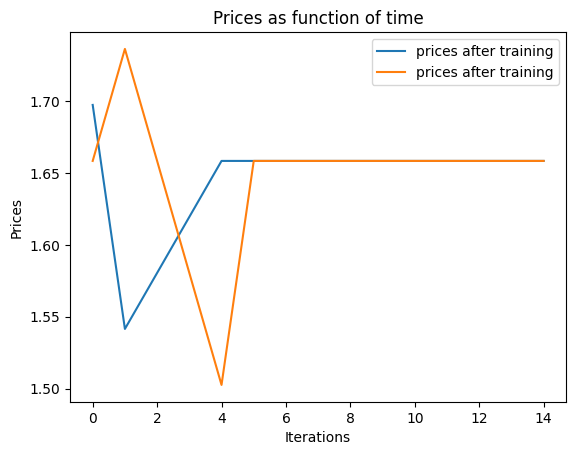

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(len(prices)), prices, label=f"prices after training")

plt.xlabel("Iterations")
plt.ylabel("Prices")
plt.title("Prices as function of time")
plt.legend()
plt.show()